# Compute a rate-of-change metric for male and female mice as they age

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.spatial.distance import pdist, squareform
from aging.plotting import format_plots, figure, save_factory, PlotConfig

In [101]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "stabilization", tight_layout=False)

In [4]:
version = 7
folder = Path(f'/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}')

In [109]:
df = pd.read_parquet(folder / "longv2_males_clean_v2.parquet")

In [110]:
df

relabeled_syllables                                                     0   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.073654   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.064727   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.087793   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.055257   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.072337   
...                                                                    ...   
111 M4_04 M4   a42fdfa5-6cd4-45e2-b22f-875a3475dc10 M4_04_55      0.050089   
    M5_01 M5   6f2c6d1c-416e-4b63-b9a0-a6d33cf63cef M5_01_55      0.060309   
    M5_02 M5   4d0d4a07-f5ea-4382-8f2f-e0370f68bd42 M5_02_55      0.055226   
    M5_03 M5   8c53a998-4b3c-4f2d-a7ef-256caac8fbc0 M5_03_55      0.070162   
    M5_04 M5   4fd15122-bc37-4b78-8a8f-8f731d3edc14 M5_04_55      0.048679   

relabeled_syllables                                                     1   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.007082   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.009032   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.007512   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.010269   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.003507   
...                                                                    ...   
111 M4_04 M4   a42fdfa5-6cd4-45e2-b22f-875a3475dc10 M4_04_55      0.037234   
    M5_01 M5   6f2c6d1c-416e-4b63-b9a0-a6d33cf63cef M5_01_55      0.044881   
    M5_02 M5   4d0d4a07-f5ea-4382-8f2f-e0370f68bd42 M5_02_55      0.045219   
    M5_03 M5   8c53a998-4b3c-4f2d-a7ef-256caac8fbc0 M5_03_55      0.050960   
    M5_04 M5   4fd15122-bc37-4b78-8a8f-8f731d3edc14 M5_04_55      0.033843   

relabeled_syllables                                                     2   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.005194   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.007025   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.008451   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.004401   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.002630   
...                                                                    ...   
111 M4_04 M4   a42fdfa5-6cd4-45e2-b22f-875a3475dc10 M4_04_55      0.026152   
    M5_01 M5   6f2c6d1c-416e-4b63-b9a0-a6d33cf63cef M5_01_55      0.019168   
    M5_02 M5   4d0d4a07-f5ea-4382-8f2f-e0370f68bd42 M5_02_55      0.026316   
    M5_03 M5   8c53a998-4b3c-4f2d-a7ef-256caac8fbc0 M5_03_55      0.039882   
    M5_04 M5   4fd15122-bc37-4b78-8a8f-8f731d3edc14 M5_04_55      0.013908   

relabeled_syllables                                                     3   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.000472   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.000502   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.000000   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.000000   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.000438   
...                                                                    ...   
111 M4_04 M4   a42fdfa5-6cd4-45e2-b22f-875a3475dc10 M4_04_55      0.016844   
    M5_01 M5   6f2c6d1c-416e-4b63-b9a0-a6d33cf63cef M5_01_55      0.021505   
    M5_02 M5   4d0d4a07-f5ea-4382-8f2f-e0370f68bd42 M5_02_55      0.044107   
    M5_03 M5   8c53a998-4b3c-4f2d-a7ef-256caac8fbc0 M5_03_55      0.034343   
    M5_04 M5   4fd1

In [111]:
def dist(df):
    return pd.DataFrame(
        squareform(pdist(df, metric="jensenshannon")),
        index=df.index.get_level_values("age"),
        columns=df.index.get_level_values("age"),
    )

In [112]:
dists = df.fillna(0).sort_index(level='age').groupby('mouse', sort=False).apply(dist)

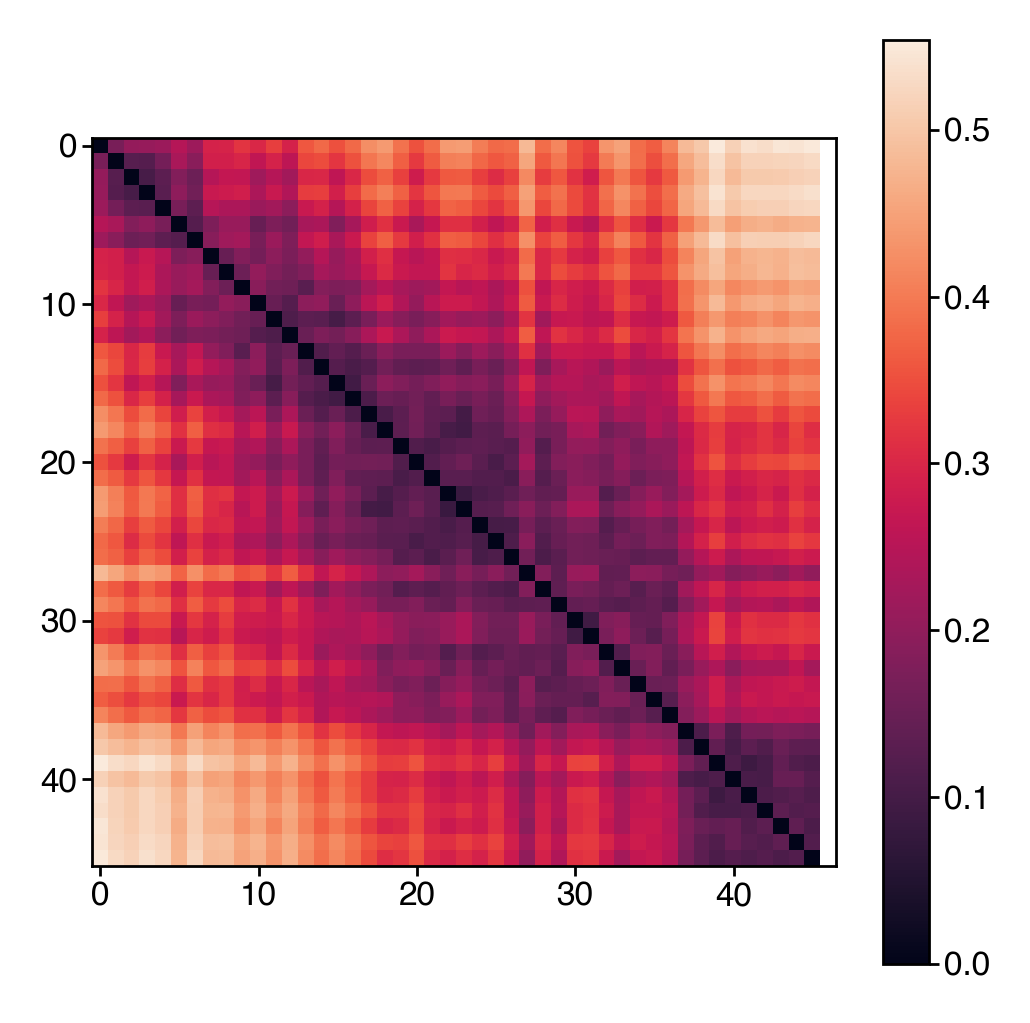

In [113]:
plt.imshow(dists.loc['M1_01'])
plt.colorbar()

In [114]:
ex = dists.loc['M1_01'].dropna(axis=1)

In [65]:
changes = []
for i in range(1, 20):
    beh_diff = np.diag(ex, i)
    age_diff = ex.index.diff(i).dropna()
    changes.append(pd.DataFrame(dict(beh=beh_diff, age_diff=age_diff, period=i, age=ex.index[i:] / 7)))
changes = pd.concat(changes, ignore_index=True)

changes['rate_of_change'] = changes['beh'] / changes['age_diff']

[Text(0.5, 0, 'Age (weeks)')]

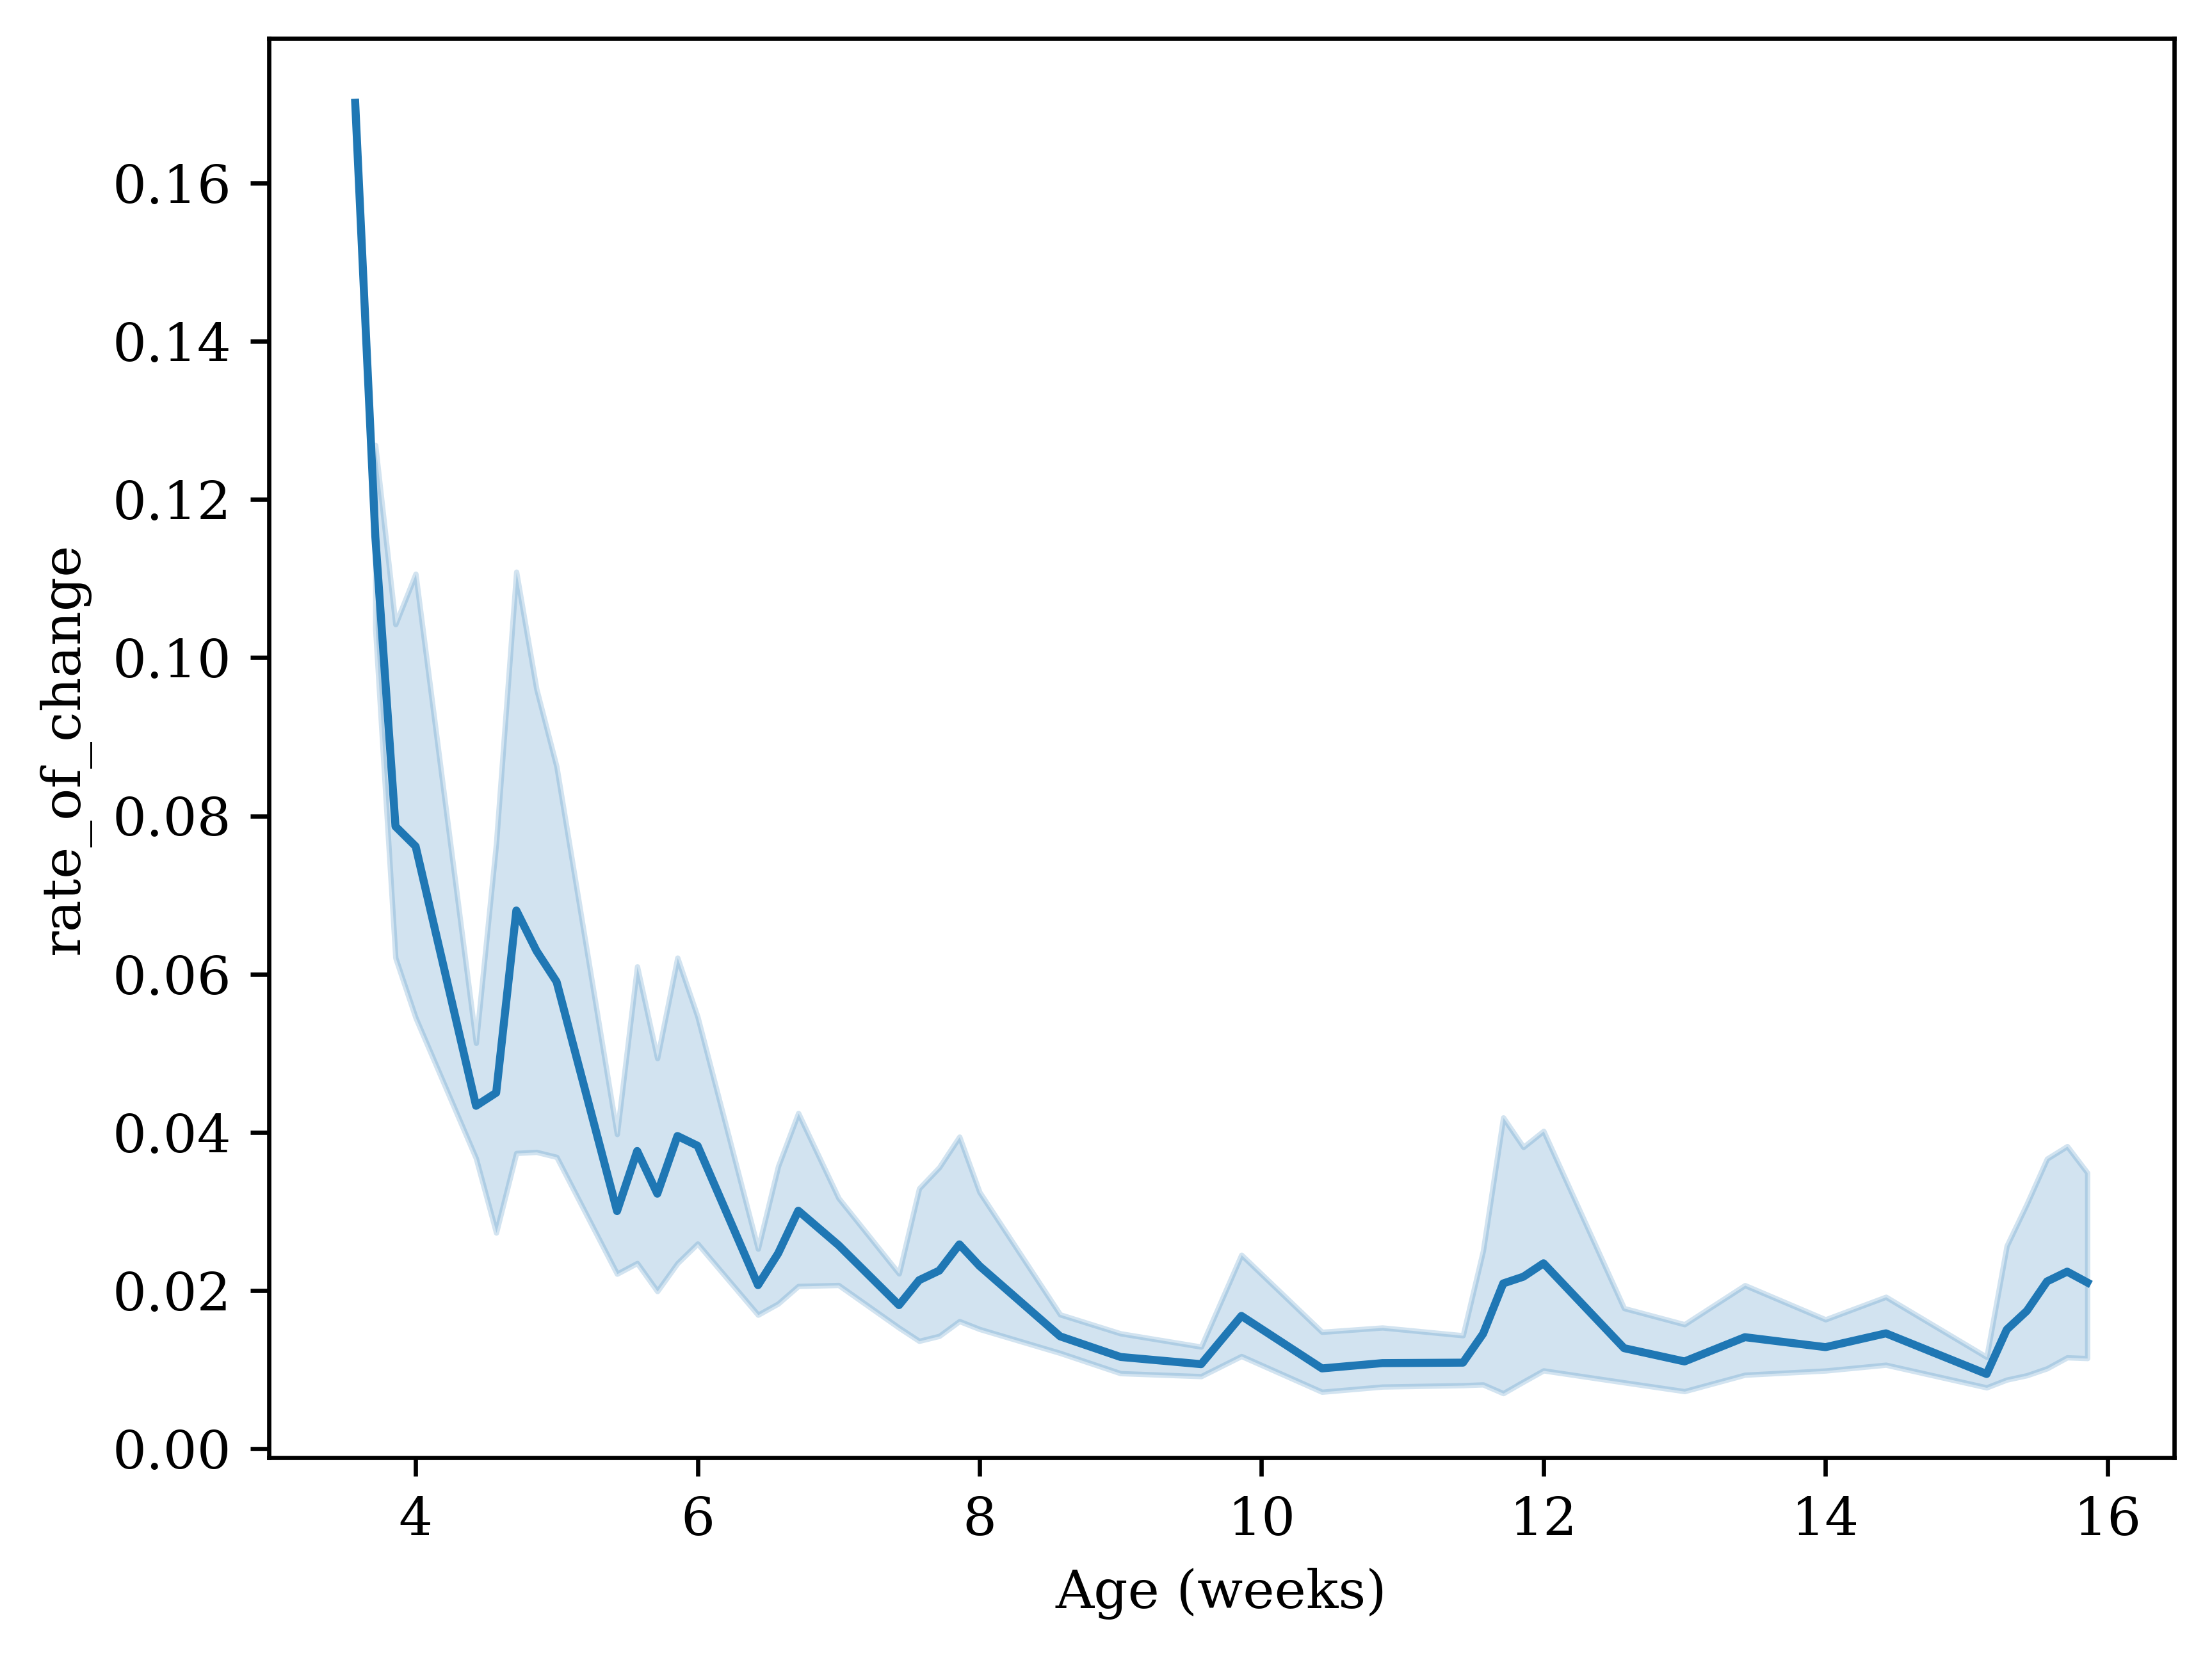

In [66]:
ax = sns.lineplot(data=changes, x='age', y='rate_of_change')
ax.set(xlabel="Age (weeks)")

In [68]:
dists.index.levels[0]

Index(['M1_01', 'M1_02', 'M1_03', 'M1_04', 'M2_01', 'M2_02', 'M2_03', 'M2_04',
       'M3_01', 'M3_02', 'M3_03', 'M3_04', 'M4_01', 'M4_02', 'M4_03', 'M4_04',
       'M5_01', 'M5_02', 'M5_03', 'M5_04'],
      dtype='object', name='mouse')

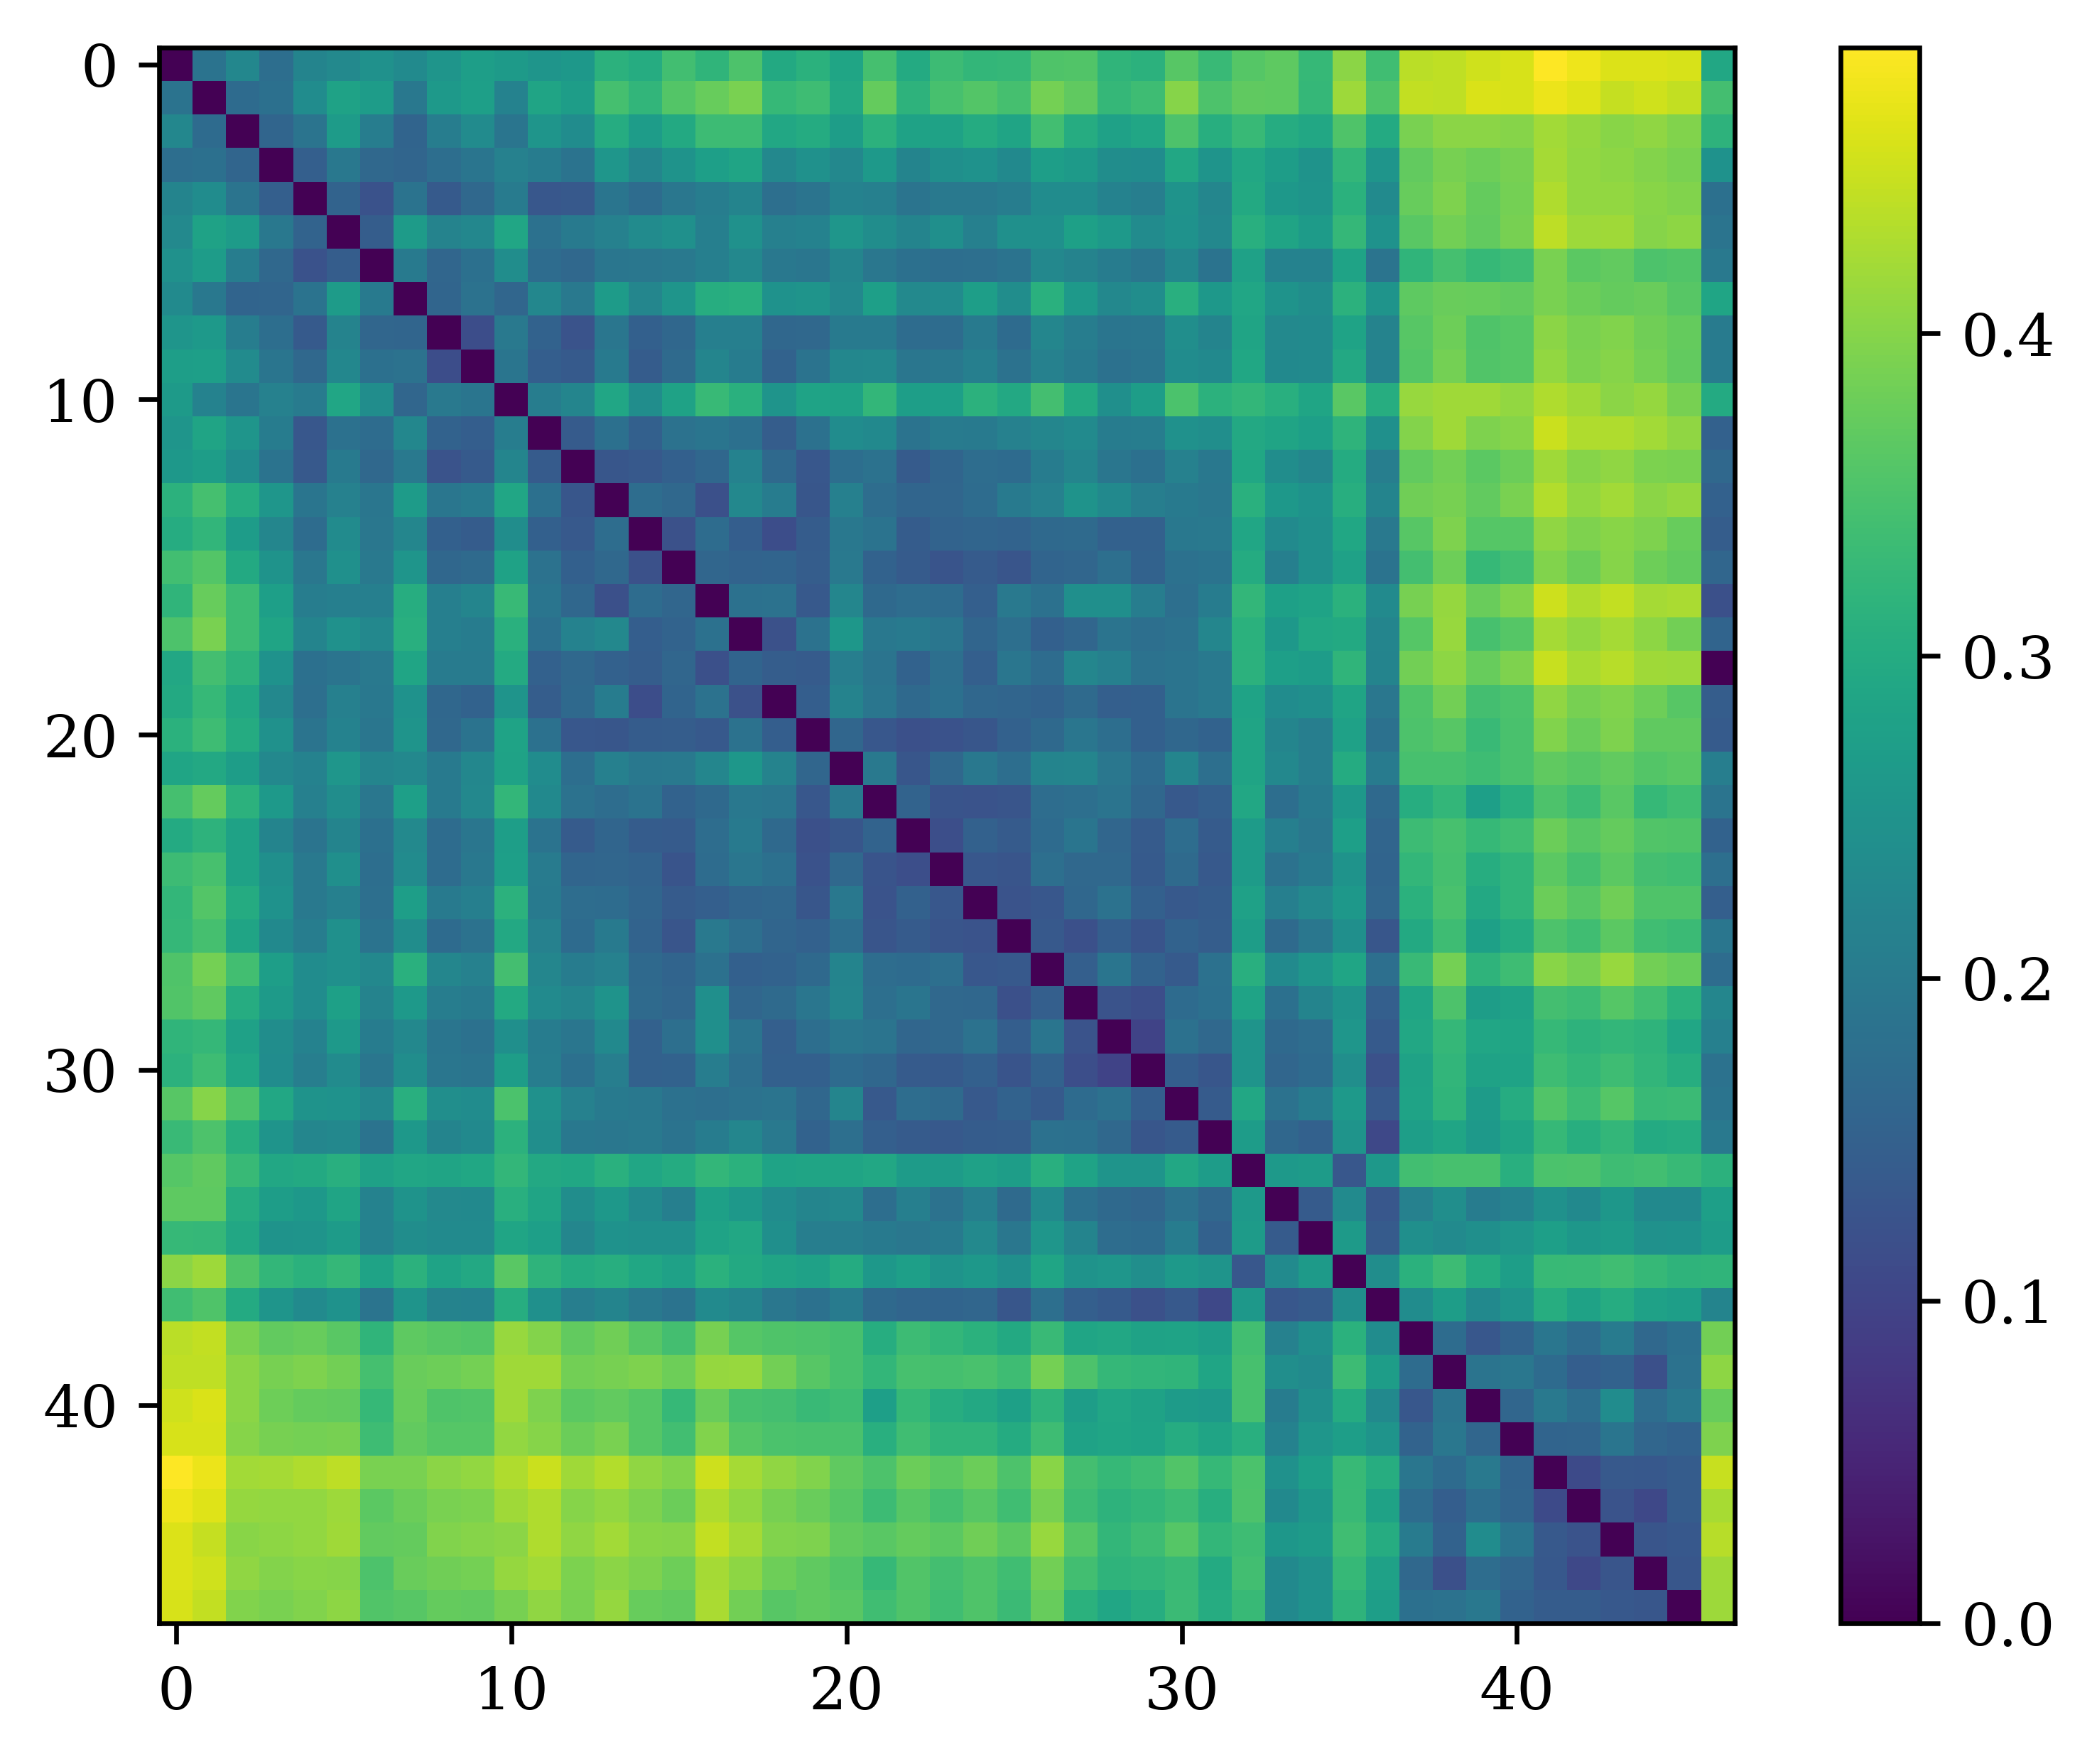

In [77]:
plt.imshow(dists.loc['M5_03'])
plt.colorbar()

In [96]:
changes = []
max_diff = 20
for mouse, dm in dists.groupby('mouse'):
    dm = dm.loc[mouse].dropna(axis=1)

    for i in range(1, max_diff):
        beh_diff = np.diag(dm, i)
        age_diff = dm.index.diff(i).dropna()
        changes.append(
            pd.DataFrame(
                dict(
                    beh=beh_diff,
                    age_diff=age_diff,
                    period=i,
                    age=dm.index[i:] / 7,
                    mouse=mouse,
                )
            )
        )
changes = pd.concat(changes, ignore_index=True)
changes["rate_of_change"] = changes["beh"] / changes["age_diff"]

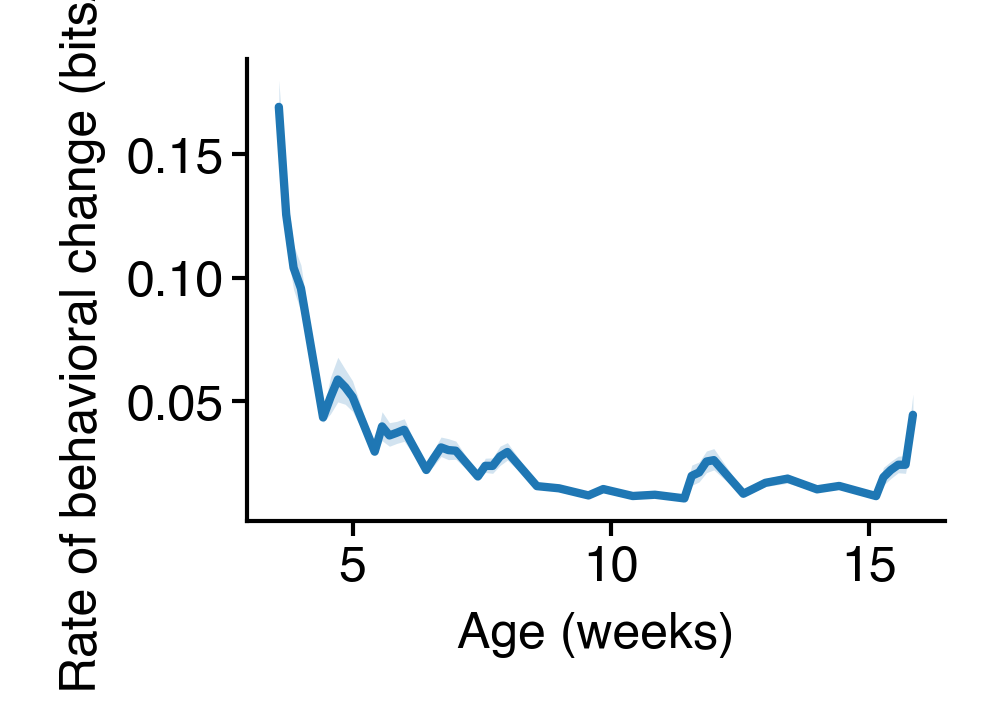

In [104]:
fig = figure(1.5, 1)
ax = sns.lineplot(data=changes, x="age", y="rate_of_change", err_kws=dict(lw=0))
ax.set(xlabel="Age (weeks)", ylabel="Rate of behavioral change (bits/day)")
sns.despine()
saver(fig, "long-v2-rate-of-change-males");

## Females

In [115]:
df = pd.read_parquet(folder / "longv2_females_clean_v2.parquet")

In [117]:
dists = df.fillna(0).sort_index(level='age').groupby('mouse', sort=False).apply(dist)

In [119]:
changes = []
max_diff = 20
for mouse, dm in dists.groupby('mouse'):
    dm = dm.loc[mouse].dropna(axis=1)

    for i in range(1, max_diff):
        beh_diff = np.diag(dm, i)
        age_diff = dm.index.diff(i).dropna()
        changes.append(
            pd.DataFrame(
                dict(
                    beh=beh_diff,
                    age_diff=age_diff,
                    period=i,
                    age=dm.index[i:] / 7,
                    mouse=mouse,
                )
            )
        )
changes = pd.concat(changes, ignore_index=True)
changes["rate_of_change"] = changes["beh"] / changes["age_diff"]

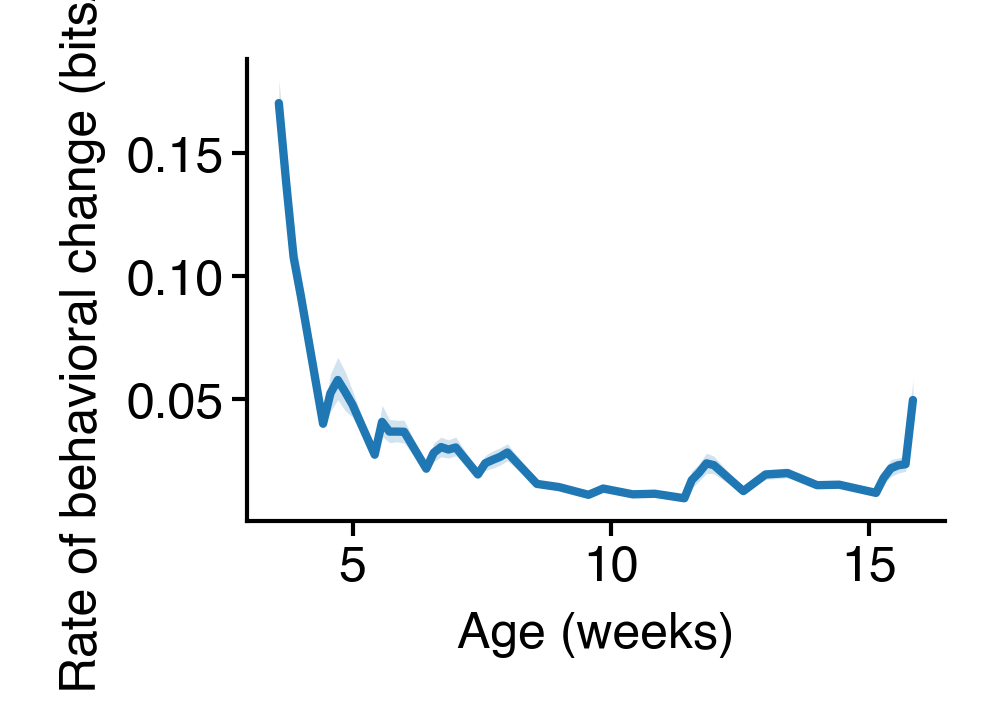

In [121]:
fig = figure(1.5, 1)
ax = sns.lineplot(data=changes, x="age", y="rate_of_change", err_kws=dict(lw=0))
ax.set(xlabel="Age (weeks)", ylabel="Rate of behavioral change (bits/day)")
sns.despine()
saver(fig, "long-v2-rate-of-change-females");